<h2>Problem Defintion</h2>
<p><i>
    Chest pain is a body discomfort affecting a significant proportion of the population. The pain can be an early indicator of a fatal heart desiese, which can be restricted from progression if diagnosed in early stages. Intuition-based analysis of a patients diagnostic reports and health records in order to decide of it is due to a heart desiese or due to some other minor circumstances, has been the traditional way of approaching such cases of chest pain. There is a significant room for enhancing the accuracy, efficiency and reliablity of this process using a data-driven approach, which goes in-hand with the domain experts (Cardiologists).</i> 

<h2>Background</h2>
<p><i>
  When a patient with a chest pain visits the Cardiologist, factors such as their <b>age</b>, <b>sex</b>, <b> chest pain type</b>, <b>resting blood pressure</b>, <b>serum cholesterol</b>, <b>fasting blood sugar</b>, <b>resting electrocardiographic results </b>, <b>maximum heart rat</b>, etc alongwith some other important factors are taken into consideration in order to investigate the cause of the pain.
</i></p> 

<h2>Unit of Analysis</h2>
<p><i>
The unit of analysis in our case is the diagnosis of the chest pain as a heart desiese.
    </i></p>  

<h2>Atteribute Information</h2>
<p>
The dataset contains 14 columns which are as follows - 
    <li><b>age</b> : age in years 
<li><b>sex</b> : (1 = male; 0 = female) 
<li><b>cp</b> : chest pain type 
    <li><b>trestbps</b> : resting blood pressure (in mm Hg on admission to the hospital) 
<li><b>chol</b> : serum cholesterol in mg/dl 
<li><b>fbs</b> : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
<li><b>restecg</b> : resting electrocardiographic results 
<li><b>thalach</b> : maximum heart rate achieved 
<li><b>exang</b> : exercise induced angina (1 = yes; 0 = no) 
<li><b>oldpeak</b> : ST depression induced by exercise relative to rest 
<li><b>slope</b> : the slope of the peak exercise ST segment 
<li><b>ca</b> : number of major vessels (0-3) colored by fluoroscopy 
<li><b>thal</b> : 3 = normal; 6 = fixed defect; 7 = reversible defect 
<li><b>target</b> : 1 or 0 </p>  

<b>Importing the required libraries</b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

<b>Reading the dataset</b>

In [2]:
df=pd.read_csv('Heart.csv')

<b>Renaming some of the columns for better interpretablity</b>

In [3]:
df=df.rename(columns={'cp':'pain_type', 'trestbps': 'rest_bp', 'fbs':'fast_bp', 'restecg':'test_ecg', 'thalach':'max_hr',
       'exang ':'ex_angina', 'oldpeak':'st_depression', 'ca':'number_vessels', 'target':'heart_des'})

<b>Checking a sample of the data</b>

In [4]:
df.sample(5)

,age,sex,pain_type,rest_bp,chol,fast_bp,test_ecg,max_hr,exang,st_depression,slope,number_vessels,thal,heart_des
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
128,52,0,2,136,196,0,0,169,0,0.1,1,0,2,1
226,62,1,1,120,281,0,0,103,0,1.4,1,1,3,0
32,44,1,1,130,219,0,0,188,0,0.0,2,0,2,1
186,60,1,0,130,253,0,1,144,1,1.4,2,1,3,0


<b>Checking for any missing (NaN) values</b>

In [5]:
df.isnull().sum()

age               0
sex               0
pain_type         0
rest_bp           0
chol              0
fast_bp           0
test_ecg          0
max_hr            0
exang             0
st_depression     0
slope             0
number_vessels    0
thal              0
heart_des         0
dtype: int64

<i>Here, no missing values are present</b>

<b>Checking for the data-types and the shape of the dataset</b>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age               303 non-null int64
sex               303 non-null int64
pain_type         303 non-null int64
rest_bp           303 non-null int64
chol              303 non-null int64
fast_bp           303 non-null int64
test_ecg          303 non-null int64
max_hr            303 non-null int64
exang             303 non-null int64
st_depression     303 non-null float64
slope             303 non-null int64
number_vessels    303 non-null int64
thal              303 non-null int64
heart_des         303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<i>We have 302 rows and 14 columns. All the atteribures are either of integer or floar data-types. So we would no require any sort of data-transformation. Though we might require an encoding at the later stages</i>

<h2>Questions and Solutions</h2>

<b>1. How many are suffering from heart disease? Also plot the stats. </b>


The number of patients suffering from heart desiese is: 165 out of 303 which is 54.46 % of the total sample.



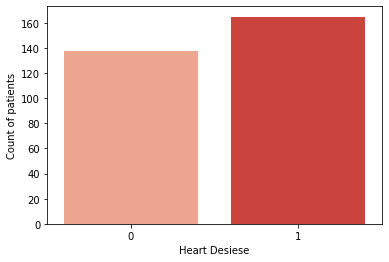

In [7]:
print('')
print('The number of patients suffering from heart desiese is:', df.heart_des.value_counts()[1],'out of',len(df.heart_des),'which is',np.round((df.heart_des.value_counts()[1]/len(df.heart_des))*100,decimals=2),'% of the total sample.')
print('')
sns.countplot(df.heart_des,palette='Reds')
plt.xlabel('Heart Desiese')
plt.ylabel('Count of patients')
plt.show()

<b>2. How many males and females have heart disease out of total?  </b>


Out of 165 patients having heart desiese 72 are females and 93 are males which implies 56.36 of the heart patients are males.



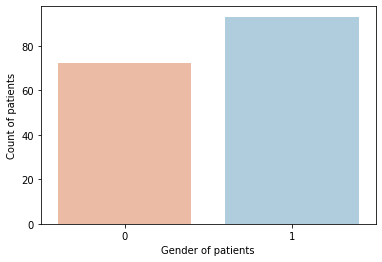

In [8]:
print('')
print('Out of',df.heart_des.value_counts()[1],'patients having heart desiese',df[df.sex==0].heart_des.value_counts()[1],'are females and',df[df.sex==1].heart_des.value_counts()[1],'are males which implies',np.round((df[df.sex==1].heart_des.value_counts()[1]/df.heart_des.value_counts()[1])*100,decimals=2),'of the heart patients are males.')
print('')
sns.countplot(df[df.heart_des==1].sex,palette='RdBu')
plt.xlabel('Gender of patients')
plt.ylabel('Count of patients')
plt.show()

<b>3. Visualize frequency distribution of the thalach (max heart rate) variable and find what's the heart rate and heart disease relation?   </b>

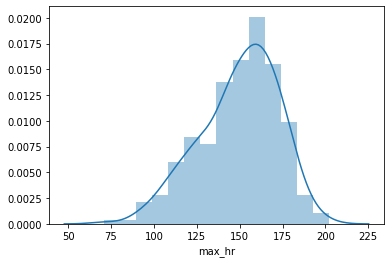

In [9]:
sns.distplot(df.max_hr)
plt.show()

* $H_o:$ Data IS Normal
* $H_a:$Data IS NOT Normal

In [10]:
t,p=stats.shapiro(df.max_hr)
print('Since the p-value,',np.round(p,decimals=4),'is less than 0.05, we reject the Null Hypothesis. Data is deviated from being normal.')

Since the p-value, 0.0001 is less than 0.05, we reject the Null Hypothesis. Data is deviated from being normal.


In [11]:
print('The data is left-skewed with a Kurtosis of:',np.round(df.max_hr.kurtosis(),decimals=4))

The data is left-skewed with a Kurtosis of: -0.062


In [12]:
print("The pearson's correlation between heart desease and max heart rate is", np.round(df.heart_des.corr(other=df.max_hr),decimals=4))

The pearson's correlation between heart desease and max heart rate is 0.4217


<i>Since the heart desease and max heart rate are positively correlated, chances of Heart desiese increase with increase in heart rate.</i>

<b><i>Hypothesis test of mean heart rate of patients with and without heart desiese</i></b>
<p>
 <li>$H_0:\mu_{HeartRateOfHeart Desiese}=\mu_{HeartRateOfNo Heart Desiese}$
 <li>$H_0:\mu_{HeartRateOfHeart Desiese}!=\mu_{HeartRateOfNo Heart Desiese}$
     
<i>Forming two groups and testing for normality of both the groups.</i>
</p>

In [13]:
g1=df[df.heart_des==0]
g2=df[df.heart_des==1]
t1,p1=stats.shapiro(g1.max_hr)
t2,p2=stats.shapiro(g2.max_hr)
print('The p-value for shapiro test of group 1 :',np.round(p1,decimals=4))
print('The p-value for shapiro test of group 1 :',np.round(p2,decimals=4))

The p-value for shapiro test of group 1 : 0.4253
The p-value for shapiro test of group 1 : 0.0004


<i>Since for both the groups the p-value is less than 0.05, we reject the null and state that <b>Both the groups are NOT normal</b>.</i>

<i>Now we perform <b>Mannwhitneyu Test</b> to find if the mean of both the group are the same or NOT</i>

In [14]:
t,p=stats.mannwhitneyu(g1.chol,g2.chol)
print('The p-value for Mannwhitneyu test :',np.round(p,decimals=4))

The p-value for Mannwhitneyu test : 0.0179


<i>Since the p-value is less than 0.05, we reject the null and state that <b>The mean heart rates of both the groups is NOT the same</b>.</i>

<i>Now we perform <b>post-hoc analysis</b> to analyse the mean heart rates of both the groups</i>

In [15]:
print('The mean heart rate of patients without a heart desiese:',np.round(g1.max_hr.mean(),decimals=2))
print('The mean heart rate of patients with a heart desiese:',np.round(g2.max_hr.mean(),decimals=2))

The mean heart rate of patients without a heart desiese: 139.1
The mean heart rate of patients with a heart desiese: 158.47


<i>Now, we interpret the model coefficients</i>

In [16]:
X=df.max_hr
Y=df.heart_des
XC=sm.add_constant(X)
result=sm.Logit(Y,XC).fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.592833
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              heart_des   No. Observations:                  303
Model:                          Logit   Df Residuals:                      301
Method:                           MLE   Df Model:                            1
Date:                Thu, 27 Feb 2020   Pseudo R-squ.:                  0.1398
Time:                        02:40:17   Log-Likelihood:                -179.63
converged:                       True   LL-Null:                       -208.82
Covariance Type:            nonrobust   LLR p-value:                 2.160e-14
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.3915      0.987     -6.475      0.000      -8.326      -4.457
max_hr         0.0440      0.

<i>So, we can conclude that with an unit increase in max heart rate, there is a <b>4.4 %</b> increase in probablity of a heart desiese.</i>

<b>4. Find correlation matrix for all the variables with target. </b>

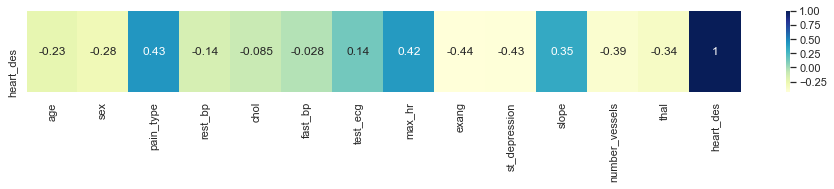

In [17]:
sns.set(rc={'figure.figsize':(16,1.5)})
sns.heatmap(pd.DataFrame(pd.DataFrame(df.corr()).heart_des).T,annot=True, cmap='YlGnBu')
plt.show()

<b>5. Find Mean,Min & Max of age and plot its distribution. </b>

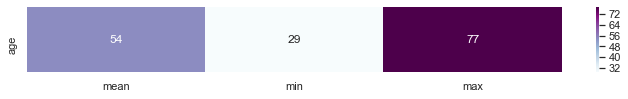

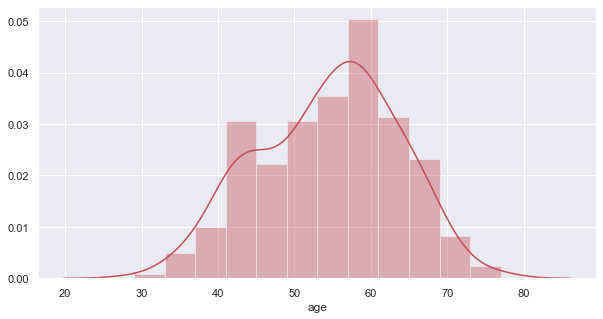

In [18]:
sns.set(rc={'figure.figsize':(12,1.2)})
sns.heatmap((pd.DataFrame(df.age.describe()).T)[['mean', 'min', 'max']], annot=True,  cmap='BuPu')
plt.show()
print('')
sns.set(rc={'figure.figsize':(10,5)})
sns.distplot(df.age, color='r')
plt.show()

<b>6. Age and its relation to heart disease. Are young people more prone to heart disease?  </b>

In [19]:
print("The pearson's correlation between heart desease and age is", np.round(df.heart_des.corr(other=df.age),decimals=4))

The pearson's correlation between heart desease and age is -0.2254


<i>Since the age and max heart rate are negatively correlated, chances of Heart desiese decrease with increase in age.</i>

<b><i>Hypothesis test of mean age of patients with and without heart desiese</i></b>
<p>
 <li>$H_0:\mu_{AgeOfHeart Desiese}=\mu_{AgeOfNo Heart Desiese}$
 <li>$H_0:\mu_{AgeOfHeart Desiese}!=\mu_{AgeOfNo Heart Desiese}$
     
<i>Forming two groups and testing for normality of both the groups.</i>
</p>

In [20]:
g1=df[df.heart_des==0]
g2=df[df.heart_des==1]
t1,p1=stats.shapiro(g1.age)
t2,p2=stats.shapiro(g2.age)
print('The p-value for shapiro test of group 1 :',np.round(p1,decimals=4))
print('The p-value for shapiro test of group 1 :',np.round(p2,decimals=4))

The p-value for shapiro test of group 1 : 0.0029
The p-value for shapiro test of group 1 : 0.1211


<i>Since for only the first group the p-value is less than 0.05, we reject the null and state that <b>One of the groups are NOT normal</b>.</i>

<i>Now we perform <b>Mannwhitneyu Test</b> to find if the mean of both the group are the same or NOT</i>

In [21]:
t,p=stats.mannwhitneyu(g1.age,g2.age)
print('The p-value for Mannwhitneyu test :',np.round(p,decimals=10))

The p-value for Mannwhitneyu test : 1.71926e-05


<i>Since the p-value is less than 0.05, we reject the null and state that <b>The mean age of both the groups is NOT the same</b>.</i>

<i>Now we perform <b>post-hoc analysis</b> to analyse the mean age of both the groups</i>

In [22]:
print('The mean age of patients without a heart desiese:',np.round(g1.age.mean(),decimals=2))
print('The mean age of patients with a heart desiese:',np.round(g2.age.mean(),decimals=2))

The mean age of patients without a heart desiese: 56.6
The mean age of patients with a heart desiese: 52.5


<i>Now, we interpret the model coefficients</i>

In [23]:
X=df.age
Y=df.heart_des
XC=sm.add_constant(X)
result=sm.Logit(Y,XC).fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.663138
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              heart_des   No. Observations:                  303
Model:                          Logit   Df Residuals:                      301
Method:                           MLE   Df Model:                            1
Date:                Thu, 27 Feb 2020   Pseudo R-squ.:                 0.03778
Time:                        02:40:19   Log-Likelihood:                -200.93
converged:                       True   LL-Null:                       -208.82
Covariance Type:            nonrobust   LLR p-value:                 7.128e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0362      0.756      4.014      0.000       1.554       4.519
age           -0.0524      0.

<i>So, we can conclude that with an unit increase in age, there is a <b>5.2 %</b> decrease in probablity of a heart desiese.</i>
<i>Hence, Young people are more prone to heart desiese.</i>

<b>7. Plot chest pain type pie chart.</b>

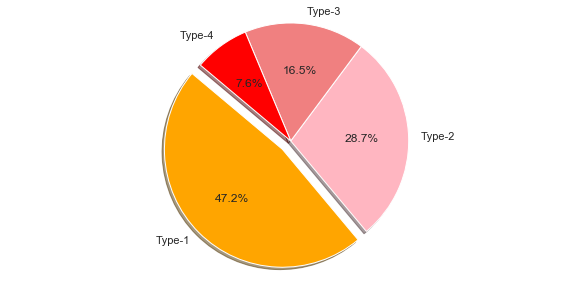

In [24]:
labels = 'Type-1', 'Type-2', 'Type-3', 'Type-4'
counts = list(df.pain_type.value_counts().values)
colors = ['orange', 'lightpink', 'lightcoral', 'red']
explode = (0.1, 0, 0, 0)  # explode 1st slice
plt.pie(counts, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

<b>8. What is the max heart rate achieved in non heart disease patients? 
</b>

In [25]:
print('The max heart rate achieved in non heart disease patients is :',max(df[df.heart_des==0].max_hr),'bpm')

The max heart rate achieved in non heart disease patients is : 195 bpm
